# Week 1 Discussion: Cross-Validation and the Bootstrap

# Credit

This discussion on model selection is a Python adaptation from p. 190-197 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. 

# Data Exploration

In this section we learn how to import and explore the data in Python. Pandas library is used extensively for data manipulation and analysis in Python. Here we also use Pandas for importing and working with the data. In most cases, exploring the data is beneficial, if not necessary, as it provides information regarding how the data needs to be treated. For example, many machine learning algorithms require the data to be in numerical format therefore the categorical features need to be transformed into a format named *one hot encoded*. Therefore, exploring the data can always be a good starting point.

First, we start by importing Pandas library as well as Numpy library which makes working with arrays and matrices easier.

In [1]:
import pandas as pd
import numpy as np

Now, we read the data we have downloaded previously. Since the data is in CSV format, we use *read_csv* function. Please refer to its documentation which can be found online if you are not familiar with the arguments. The *read* function in Pandas library returns an object named *DataFrame*.

In [2]:
#the data can be downloaded from "https://github.com/jcrouser/islr-python/blob/master/data/Smarket.csv"
#Note: I have to use the raw file url: https://raw.githubusercontent.com/jcrouser/islr-python/master/data/Smarket.csv
df = pd.read_csv('https://raw.githubusercontent.com/jcrouser/islr-python/master/data/Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)

Function *head* prints first entries of *DataFrame*. The arguement passed below is *5*, meaning we want the first 5 entries to be shown.

In [3]:
df.head(5)

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


*DataFrame* has an attribute *shape* which contains the number of rows and columns. It can be useful in many cases for example when assessing the dataset size or iterating through rows/columns of a dataset.

In [4]:
df.shape

(1250, 8)

In order to get a summary of each feature separately, the function *describe* can be used which is a method for the *DataFrame* class:

In [5]:
df.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


There are a lot of other useful libraries that can be used for data manipulation/visualtion. As an example, we use another library below, *seaborn*, which is used for data visualization. 

The library *seaborn* has a function which plots the distribution for each variable, in addition to plotting the relationship between any two of the features. *Saeborn* library is based on *Matplotlib* which is a library used in Python for visualization.

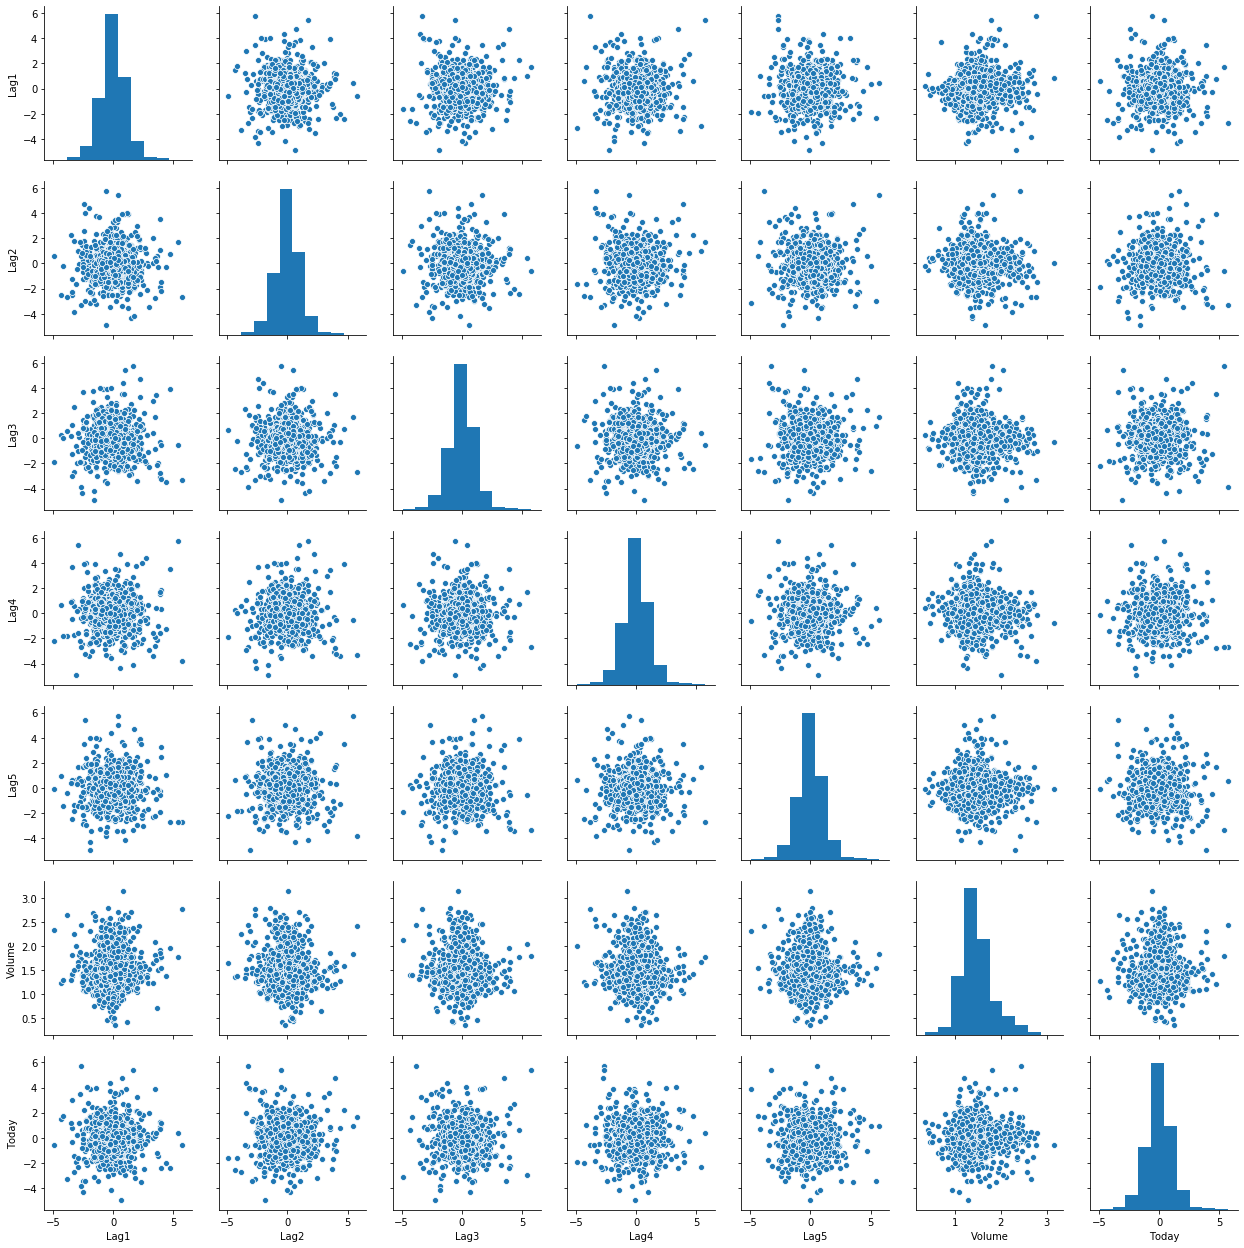

In [9]:
import seaborn as sns

sns.pairplot(df)

In this lab, we will see examples of resampling, namely, the validation set approach, leave one out cross validation, k-fold cross validation, and bootstrapping. We see all of them while using k nearest neighbors model, discussed in the class. In our experiments we model Directon based on two features which are Lag1 and Lag2. For information regarding what they are, please refer to https://cran.r-project.org/web/packages/ISLR/ISLR.pdf, section *Smarket*. 

The best value for the parameter _k_ in the algorithm _KNN_ is not necessarily known. In order to select the best value, validation methods are used which we will see here. After comparing the results as seen shortly, the best value is chosen. Here we compare *k* values from 1 to 10.

### The Validation Set Approach

In validation set approach, we split the data into two sets. We train our models on the first set while testing it on the other set. 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

random_seed = 1

x = df[['Lag1','Lag2']]
y = df['Direction']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = random_seed)

accuracy = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy.append(np.mean(pred_i != y_test))

Text(0,0.5,'Accuracy')

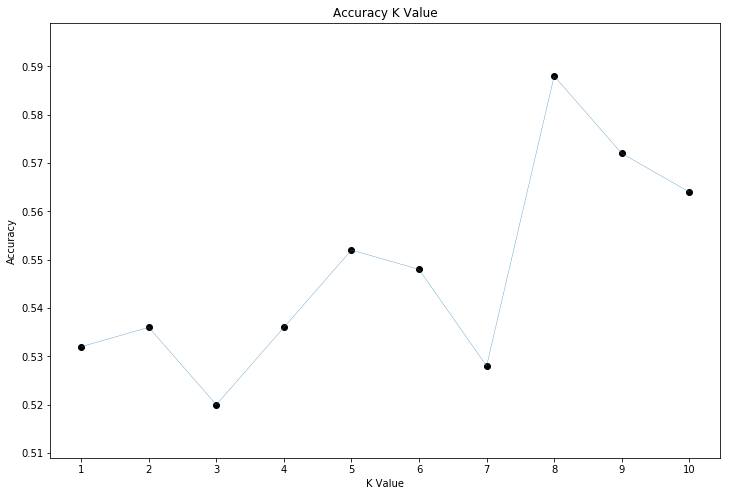

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.scatter(range(1, len(accuracy)+1), accuracy, color='black')
plt.plot(range(1, len(accuracy)+1), accuracy, linewidth=0.3)
plt.title('Accuracy K Value')
plt.xlabel('K Value')
plt.xticks(range(1,11), range(1,11))
plt.ylabel('Accuracy')

### Leave-One-Out Cross-Validation

In Leave One Out Cross Validation (LOOCV), the testing set comrpises of one sample and the training set comprises of all the other samples.

In [9]:
from sklearn.model_selection import LeaveOneOut

accuracy = []

for i in range(1, 11):    
    loo = LeaveOneOut()
    loo.get_n_splits(x)

    k_accuracy = []
    for train_index, test_index in loo.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        
        k_accuracy.append(np.mean(pred_i != y_test))
    
    
    k_accuracy = np.mean(np.asarray(k_accuracy))
    
    accuracy.append(k_accuracy)

Text(0,0.5,'Accuracy')

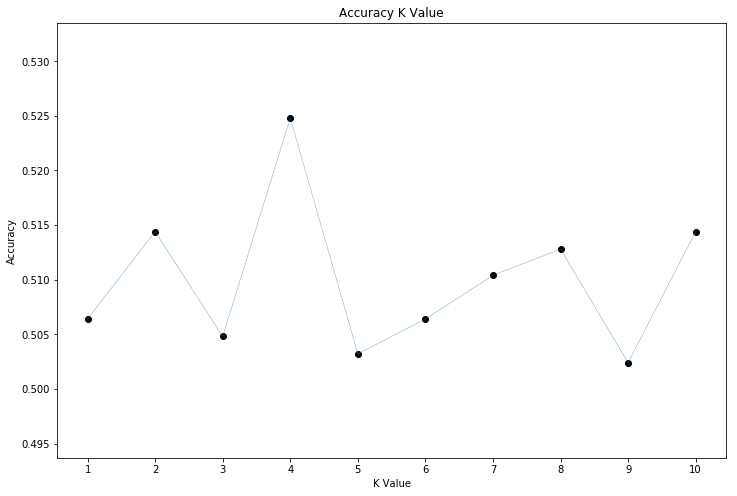

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.scatter(range(1, len(accuracy)+1), accuracy, color='black')
plt.plot(range(1, len(accuracy)+1), accuracy, linewidth=0.3)
plt.title('Accuracy K Value')
plt.xlabel('K Value')
plt.xticks(range(1,11), range(1,11))
plt.ylabel('Accuracy')

### k-Fold Cross-Validation

In k-fold cross validation, the data is divided into *k* different chunks, each time trained on *k-1* chunks, tested on the last chunk. Note that this *k* is different from the *k* used in *KNN* algorithm which is the number of neighbors considered. Here we use *k* equal to 5 for our cross validation.

In [11]:
from sklearn.model_selection import cross_val_score

accuracy = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    accuracy.append(np.mean(cross_val_score(knn, x, y, cv=5)))                               

Text(0,0.5,'Accuracy')

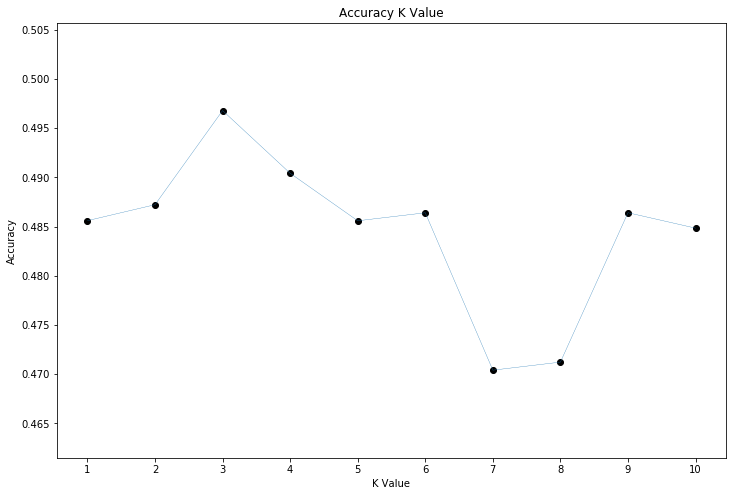

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.scatter(range(1, len(accuracy)+1), accuracy, color='black')
plt.plot(range(1, len(accuracy)+1), accuracy, linewidth=0.3)
plt.title('Accuracy K Value')
plt.xlabel('K Value')
plt.xticks(range(1,11), range(1,11))
plt.ylabel('Accuracy')

### Bootstrapping

Bootstrapping is a statistical apprpoach done by random sampling with replacement. Each time, we split the data into training set and testing set separately and try to find the best value of *k* for our *KNN* algorithm using 5 fold cross validation. We repeat it for 500 times and plot the distribution of *k*'s.

In [13]:
def best_k (k_values, x_train, y_train):
    accuracy = []
    
    for i in k_values:
        knn = KNeighborsClassifier(n_neighbors=i)
        accuracy.append(np.mean(cross_val_score(knn, x_train, y_train, cv=5)))

    return accuracy, k_values[np.argmax(np.asarray(accuracy))]

In [14]:
n_bootstraps = 500

n_test  = int(0.2*len(df))
n_train = len(df) - n_test

k_vals = [1,2,3,4,5]

best_ks = []
cross_val_results = []
for _ in range(n_bootstraps):
    train_test_indicator = np.asarray([True]*n_train + [False]*n_test)
    np.random.shuffle(train_test_indicator)
    
    x_train, x_test, y_train, y_test = x[train_test_indicator], x[np.logical_not(train_test_indicator)], y[train_test_indicator], y[np.logical_not(train_test_indicator)]
    
    cross_val_result, best_k_ = best_k (k_vals, x_train, y_train)
    
    best_ks.append(best_k_)
    cross_val_results.append(cross_val_result)

<Figure size 1152x720 with 0 Axes>

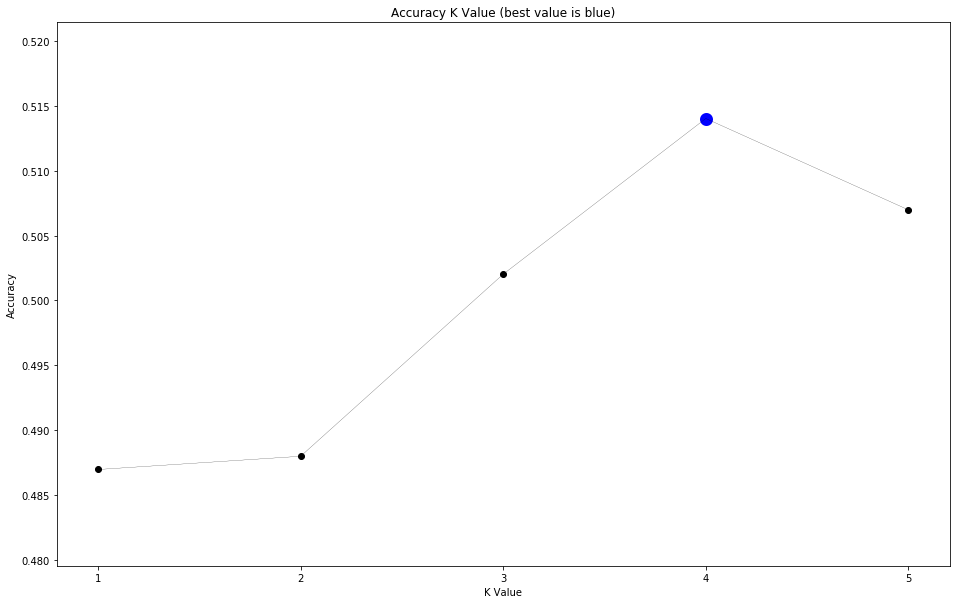

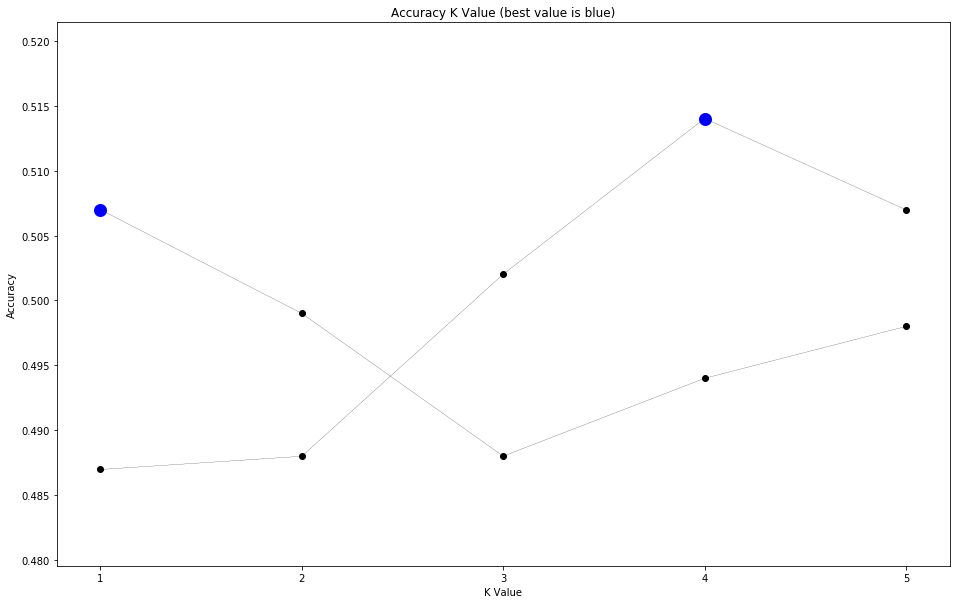

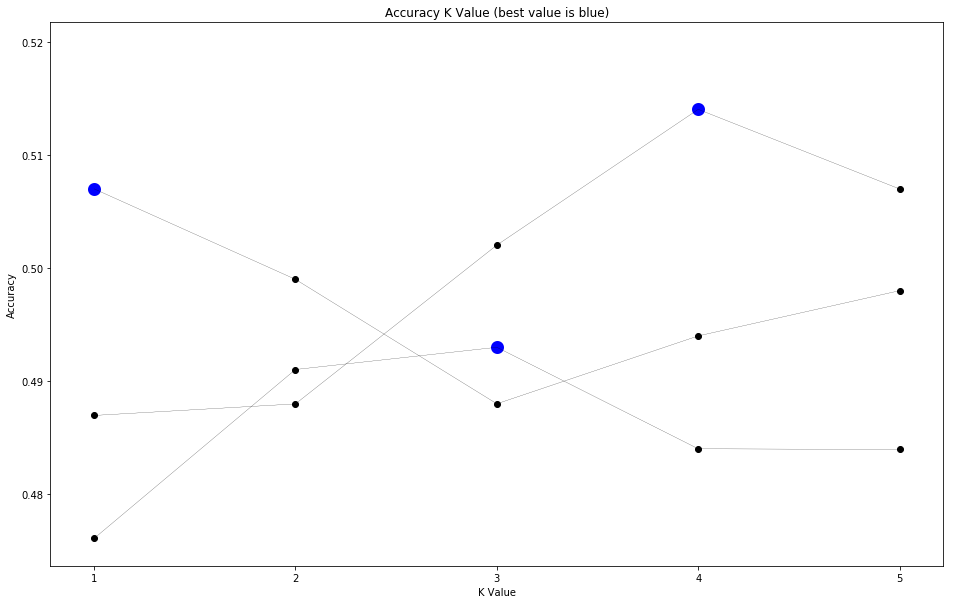

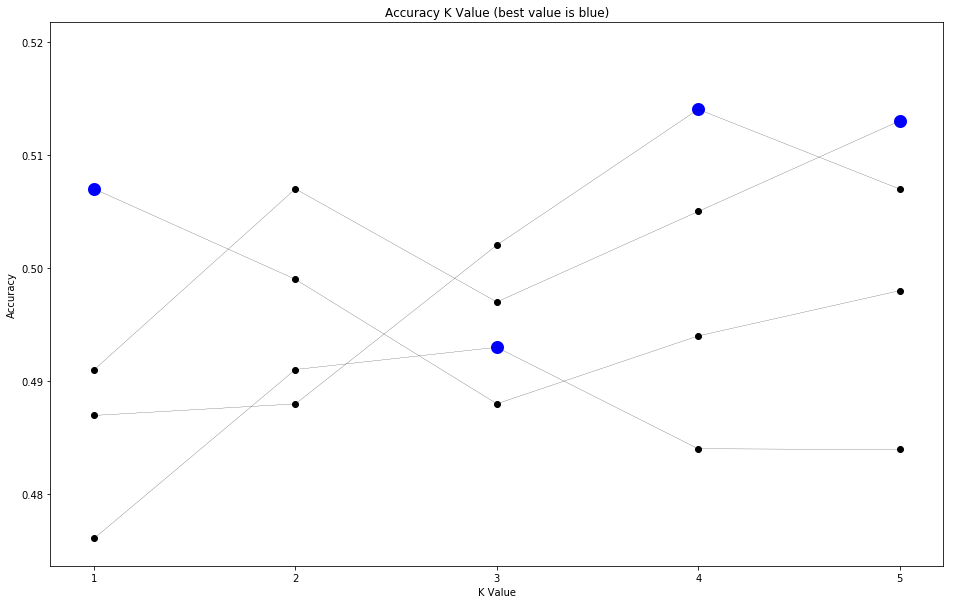

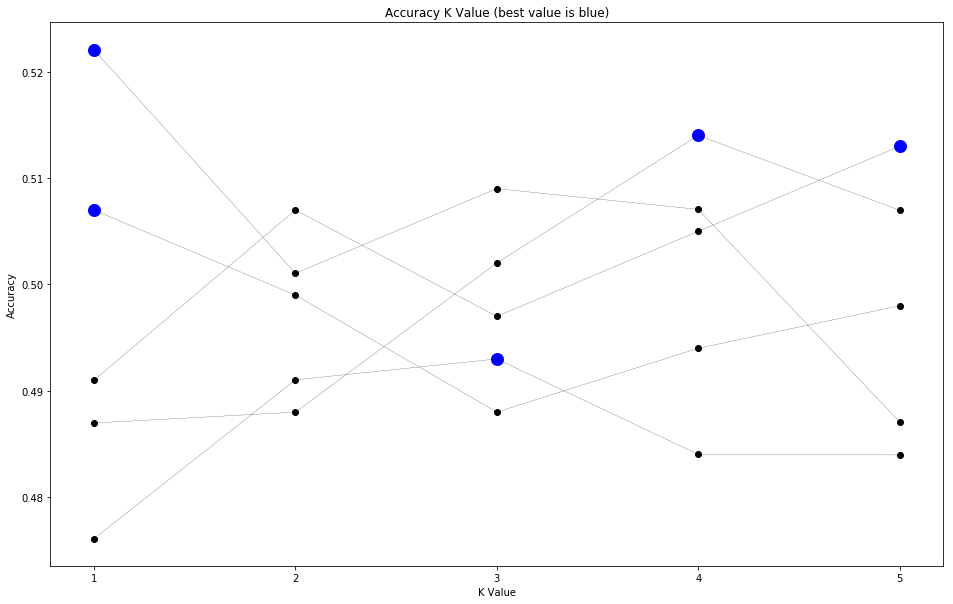

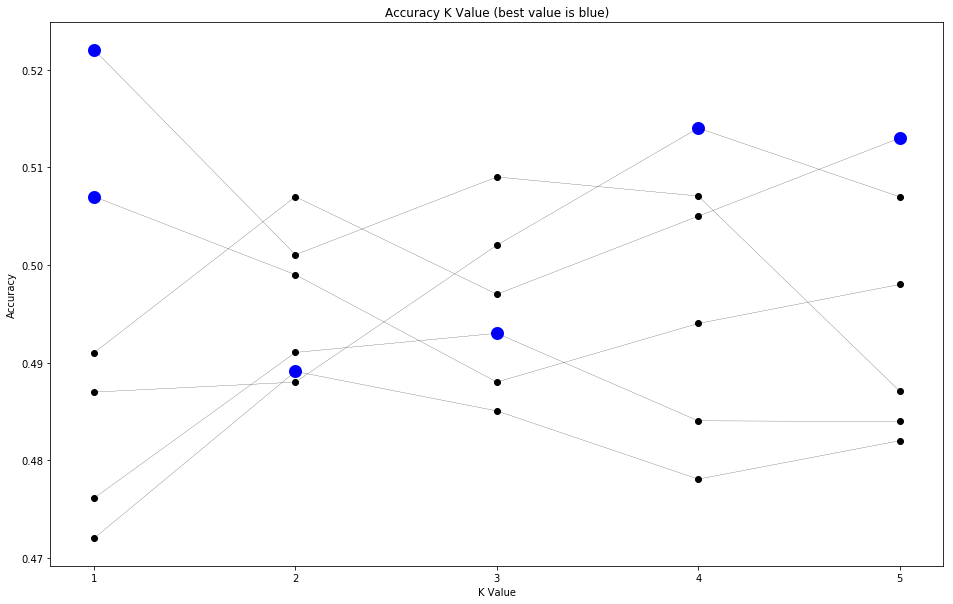

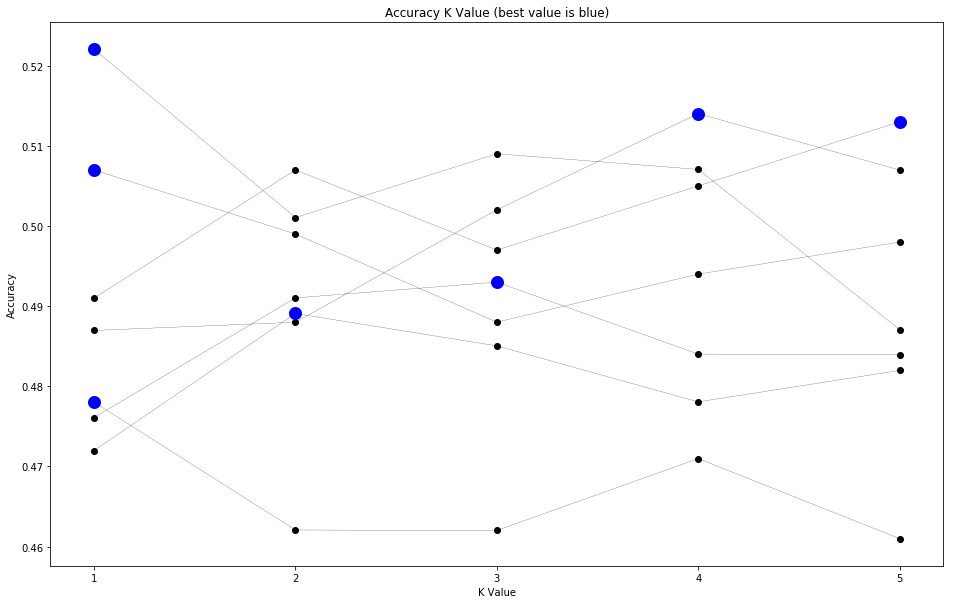

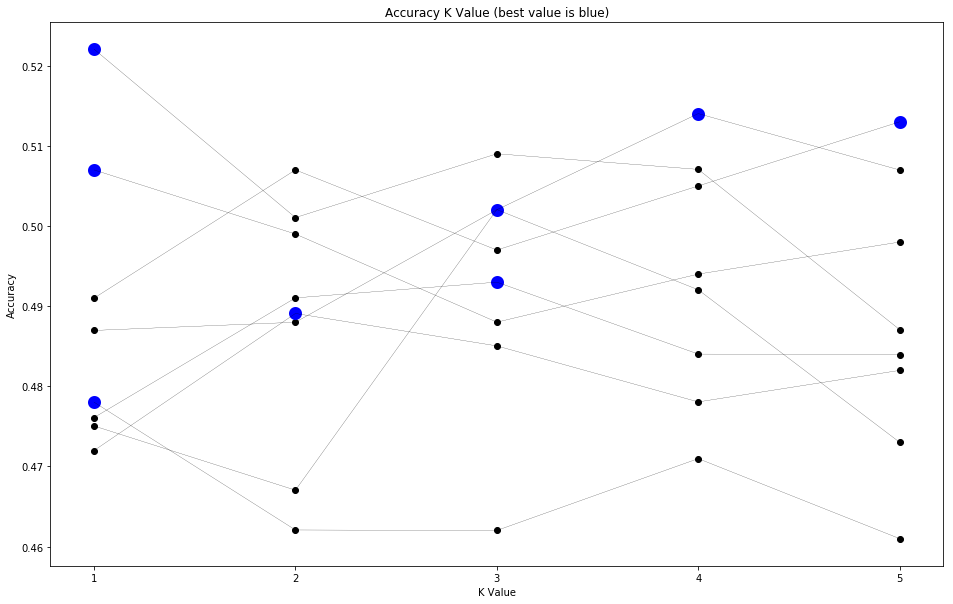

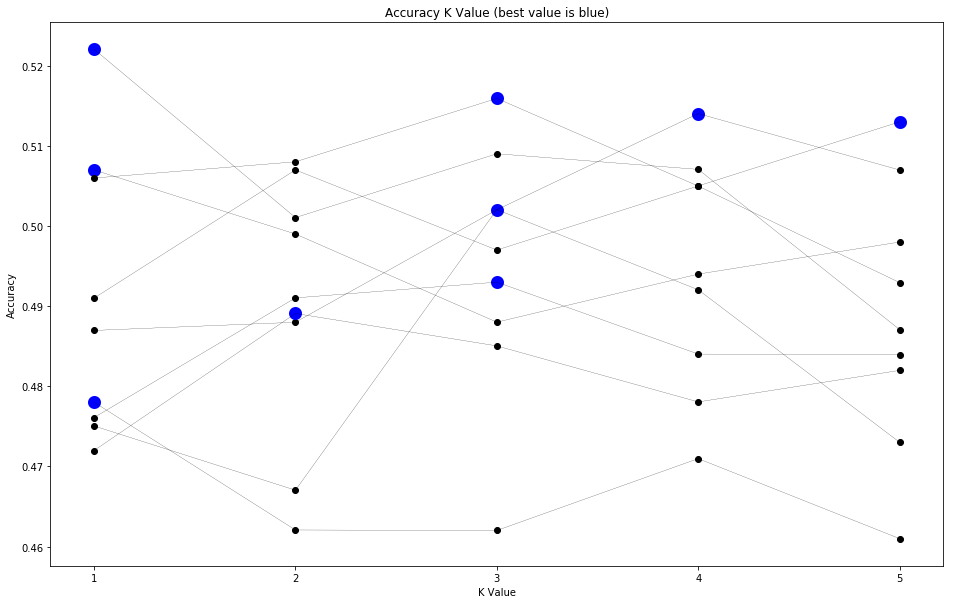

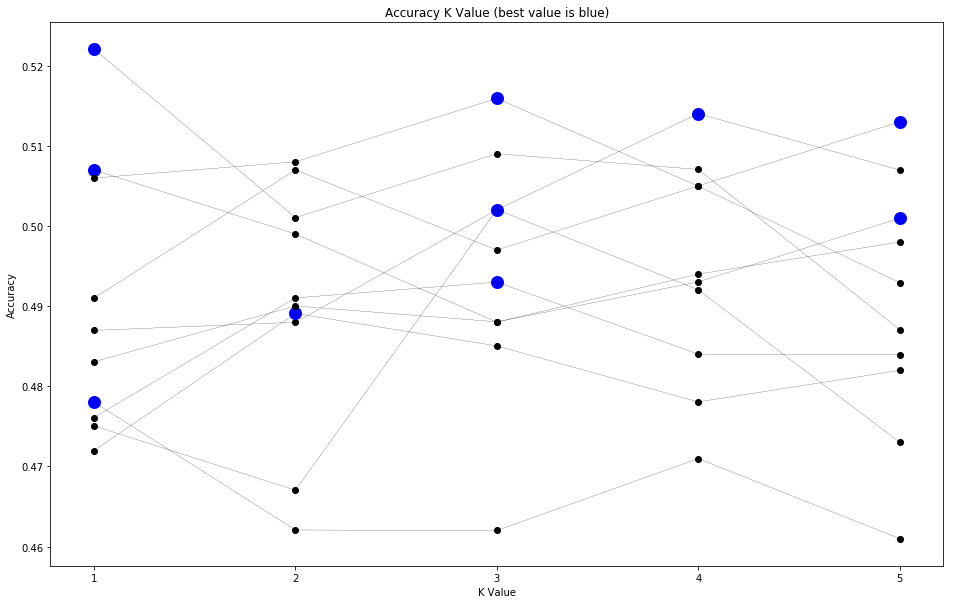

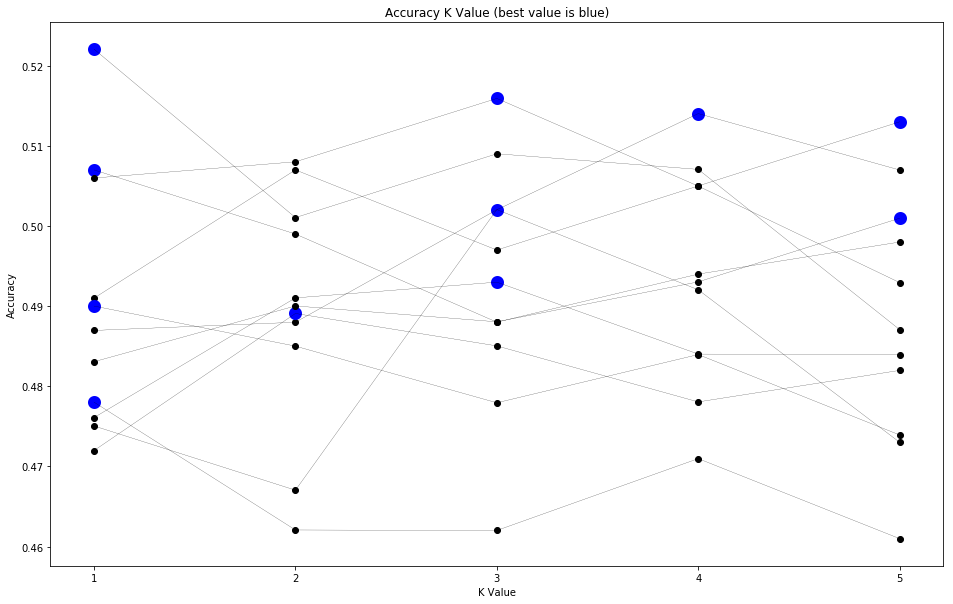

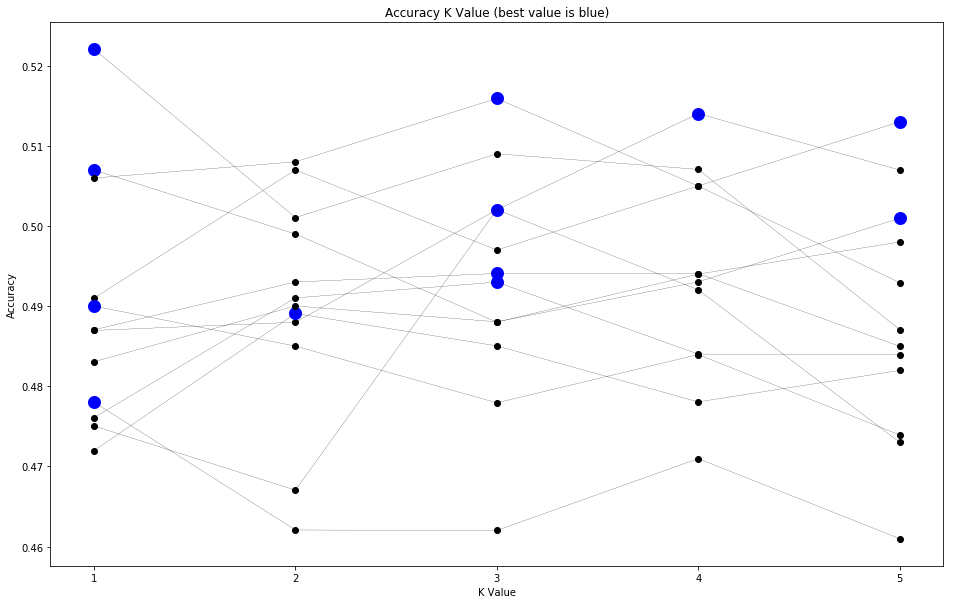

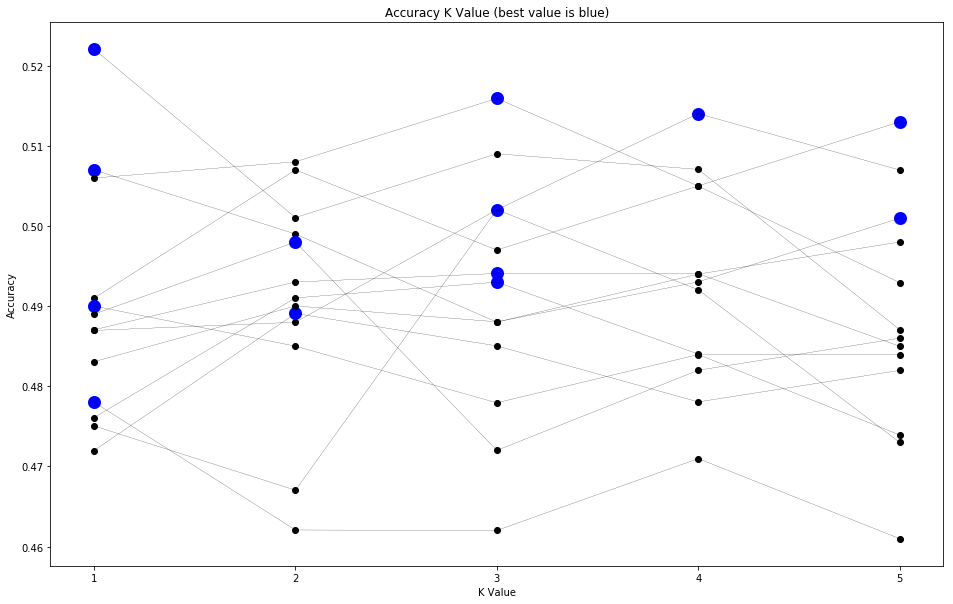

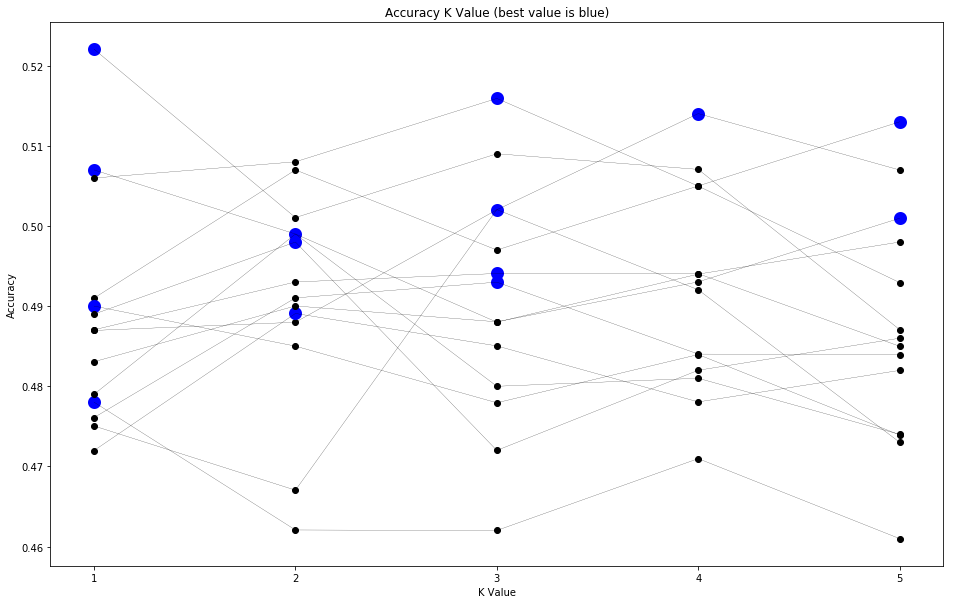

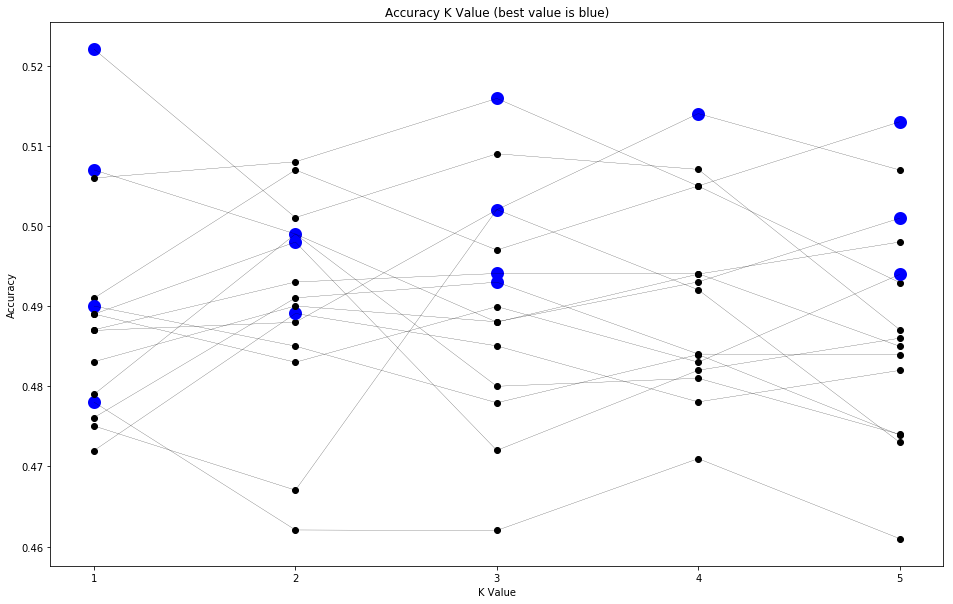

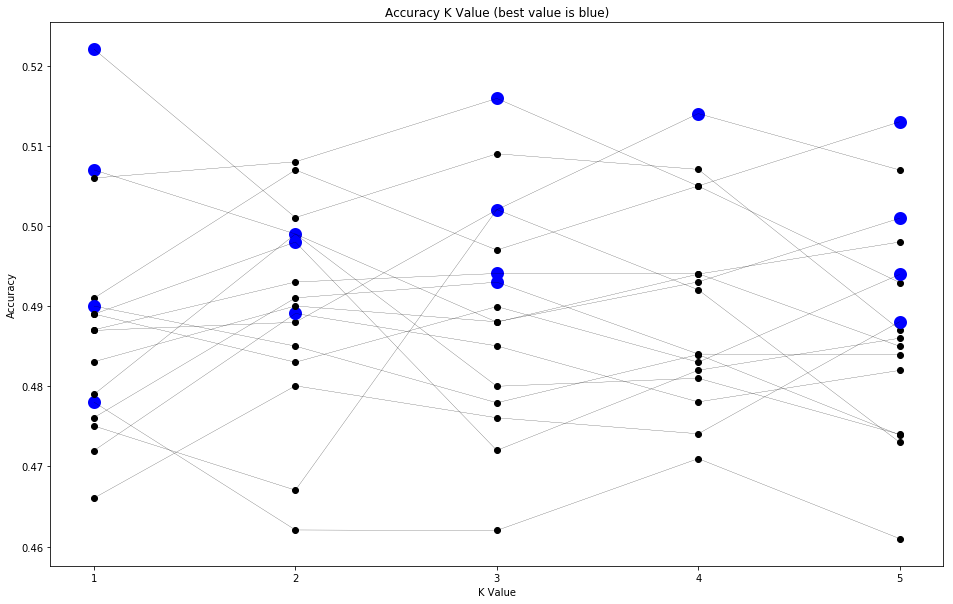

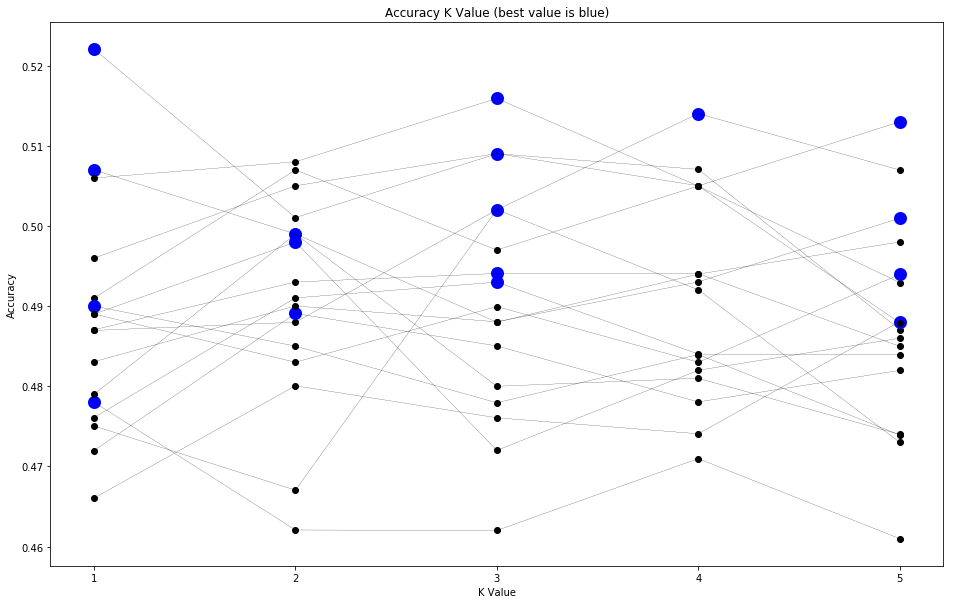

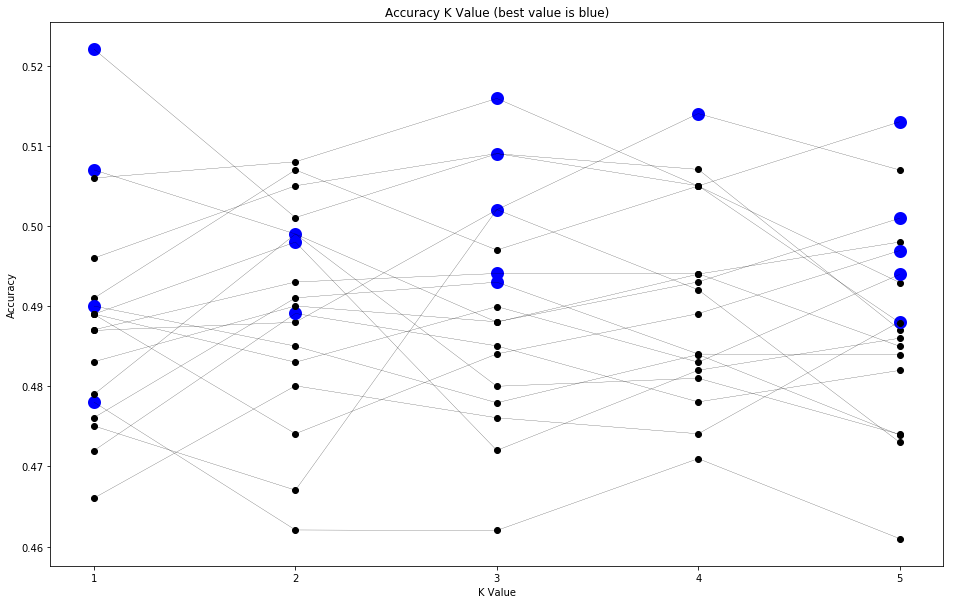

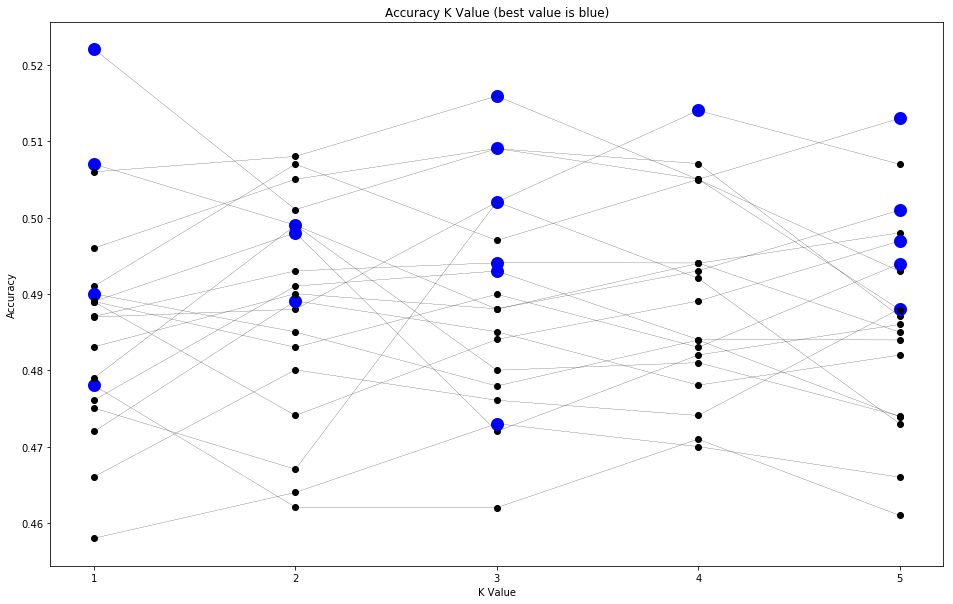

In [15]:
for i in range(20):
    plt.figure(figsize = (16,10)) 
    for j in range(i):
        accuracy = np.asarray(cross_val_results[j])
        best_k_index = np.argmax(accuracy)
        best_k_      = accuracy[best_k_index]

        plt.scatter(range(1, len(accuracy)+1), accuracy, color='black')
        plt.plot(range(1, len(accuracy)+1), accuracy, linewidth=0.2, color = 'black')

        plt.scatter(best_k_index+1, best_k_, color='blue', linewidth=7)

        plt.title('Accuracy K Value (best value is blue)')
        plt.xlabel('K Value')
        plt.xticks(range(1, len(k_vals)+1), k_vals)
        plt.ylabel('Accuracy')

The plots above show that not all the iterations necessarily have the same value chosen for *k* but below we show that some values get chosen more often.

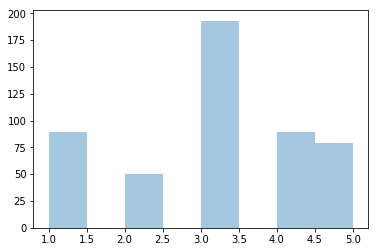

In [16]:
sns.distplot(best_ks, kde=False, rug=False)

As can be seen, not always we get the same *k* as the best value which shows that it depends on the data.